<a href="https://colab.research.google.com/github/DeeeTeeee/SepsisClassificationWithFastAPI/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data.
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...
#!pip install pandas-profiling
#!pip install shap

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [9]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import os

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
import shap
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Other packages
import os, pickle
from joblib import dump
import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [10]:
# For CSV, use pandas.read_csv
url_test = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Test.csv'
test_df = pd.read_csv(url_test,index_col=0)
#df = pd.read_csv(url)
url_train = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Train.csv'

train_df = pd.read_csv(url_train,index_col=0)
print(test_df.head(5))
print(train_df.head(5))

           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
ID                                                           
ICU200609    1  109  38  18  120  23.1  0.407   26          1
ICU200610    1  108  88  19    0  27.1  0.400   24          1
ICU200611    6   96   0   0    0  23.7  0.190   28          1
ICU200612    1  124  74  36    0  27.8  0.100   30          1
ICU200613    7  150  78  29  126  35.2  0.692   54          0
           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


# Data Understanding
The column names cant be easily understood, so I will change the `column names`

In [11]:
# Define a dictionary with the new column names
new_column_names = {
    'PRG': 'Plasma glucose',
    'PL': 'Blood Work Result-1',
    'PR': 'Blood Pressure',
    'SK': 'Blood Work Result-2',
    'TS': 'Blood Work Result-3',
    'M11': 'Body mass index',
    'BD2': 'Blood Work Result-4'
}

# Rename the columns in train_df and test_df using the dictionary
train_df.rename(columns=new_column_names, inplace=True)
test_df.rename(columns=new_column_names, inplace=True)

In [12]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma glucose       599 non-null    int64  
 1   Blood Work Result-1  599 non-null    int64  
 2   Blood Pressure       599 non-null    int64  
 3   Blood Work Result-2  599 non-null    int64  
 4   Blood Work Result-3  599 non-null    int64  
 5   Body mass index      599 non-null    float64
 6   Blood Work Result-4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


## Hypothesis:
**Older patients are more likely to develop sepsis compared to younger patients.**

* Null Hypothesis: The likelihood of developing sepsis is the same for both older and younger patients.

* Alternative Hypothesis: Older patients have a higher likelihood of developing sepsis compared to younger patients.



# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [14]:
#Explore the summary statistics of numerical columns:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


Plasma glucose
* Count: 599
* Mean: 3.82
*Standard Deviation: 3.36
*Range: 0 to 17

Blood Work Result-1
* Count: 599
* Mean: 120.15
*Standard Deviation: 32.68
*Range: 0 to 198

Blood Pressure
* Count: 599
*Mean: 68.73
*Standard Deviation: 19.34
*Range: 0 to 122

Blood Work Result-2
* Count: 599
*Mean: 20.56
*Standard Deviation: 16.02
*Range: 0 to 99

Blood Work Result-3
* Count: 599
*Mean: 79.46
*Standard Deviation: 116.58
*Range: 0 to 846

Body mass index
* Count: 599
*Mean: 32
*Standard Deviation: 8.01
*Range: 0 to 67.1

Blood Work Result-4
* Count: 599
*Mean: 0.48
*Standard Deviation: 0.34
*Range: 0.078 to 2.42

Age
* Count: 599
*Mean: 33.29
*Standard Deviation: 11.83
*Range: 21 to 81

Insurance
* Count: 599
*Proportion with Insurance: 0.686 (68.6%)

In [15]:
#Explore the summary statistics of numerical columns:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
Blood Work Result-1,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
Blood Pressure,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
Blood Work Result-2,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
Blood Work Result-3,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
Body mass index,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
Blood Work Result-4,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


Plasma glucose
* Count: 169
* Mean: 3.9
*Standard Deviation: 3.4
*Range: 0 to 13

Blood Work Result-1
* Count: 169
* Mean: 124
*Standard Deviation: 29
*Range: 56 to 199

Blood Pressure
* Count: 169
*Mean: 70
*Standard Deviation: 19
*Range: 0 to 114

Blood Work Result-2
* Count: 169
*Mean: 20
*Standard Deviation: 16
*Range: 0 to 49

Blood Work Result-3
* Count: 169
*Mean: 81
*Standard Deviation: 112
*Range: 0 to 540

Body mass index
* Count: 169
*Mean: 32
*Standard Deviation: 7.5
*Range: 0 to 57.3

Blood Work Result-4
* Count: 169
*Mean: 0.4
*Standard Deviation: 0.31
*Range: 0.1 to 1.698

Age
* Count: 169
*Mean: 33
*Standard Deviation: 12
*Range: 21 to 70

Insurance
* Count: 169
*Mean: 0.73
*Standard Deviation: 0.45
*Range: 0 to 1
*Proportion with Insurance: 0.728 (72.8%)

### Lets check for Outliers

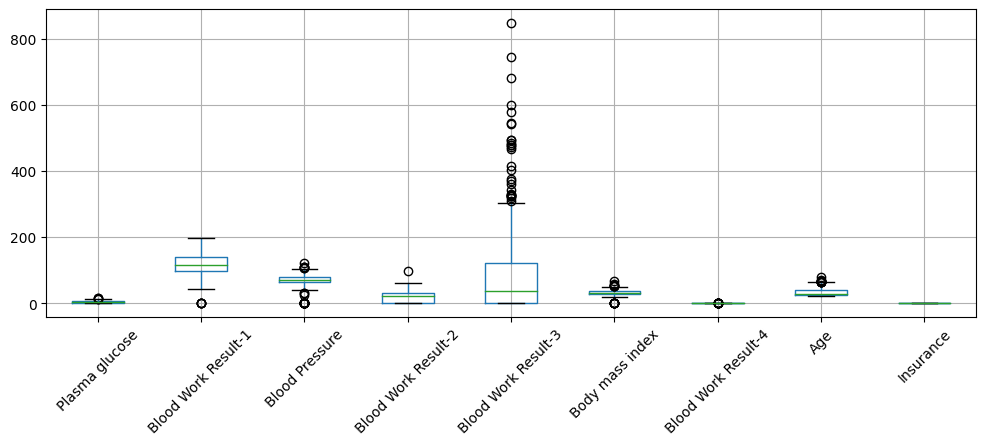

In [21]:
# Check for outliers and slant the column names on the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
train_df.boxplot(ax=ax, rot=45)

# Show the plot
plt.show()

The box plots depicted above reveal the existence of outliers within our dataset. These outliers possess the potential to influence the outcomes of machine learning models, causing them to exhibit reduced accuracy and reliability. Consequently, it becomes imperative to address these outliers through appropriate preprocessing techniques to ensure the robustness and effectiveness of our models.


So I will remove this and replace that with the **median**

In [25]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
num_df = train_df[numeric_columns]

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1
IQR
((num_df< (Q1-1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any()

Plasma glucose          True
Blood Work Result-1     True
Blood Pressure          True
Blood Work Result-2     True
Blood Work Result-3     True
Body mass index         True
Blood Work Result-4     True
Age                     True
Insurance              False
dtype: bool

In [27]:
# Specify the columns of interest
cols_names = ['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age']

# Check if outliers still exist in the columns
outliers_exist = False

for column in cols_names:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify the values in the column to be within the range
    train_df[column] = train_df[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_df[column] < lower_bound).any() or (train_df[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")

No outliers exist in the specified columns.


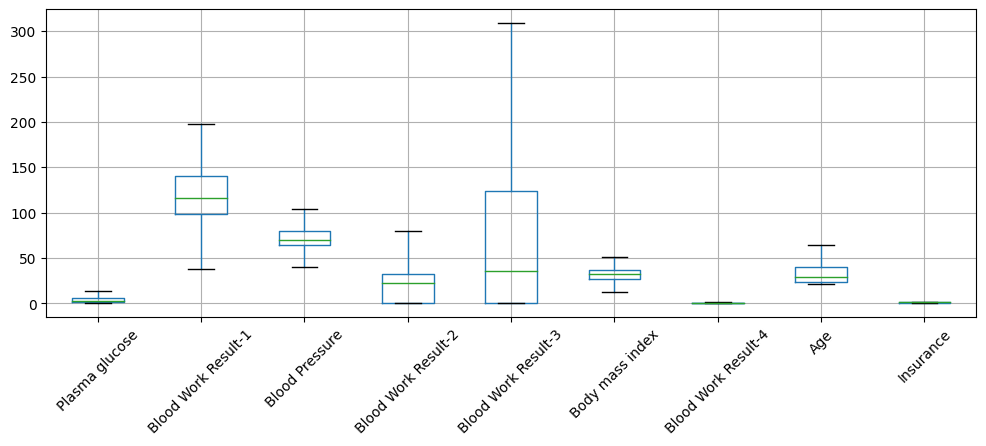

In [29]:
# Check for outliers and slant the column names on the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
train_df.boxplot(ax=ax, rot=45)

# Show the plot
plt.show()

Ok.. outliers gone

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [22]:
train_df.columns

Index(['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

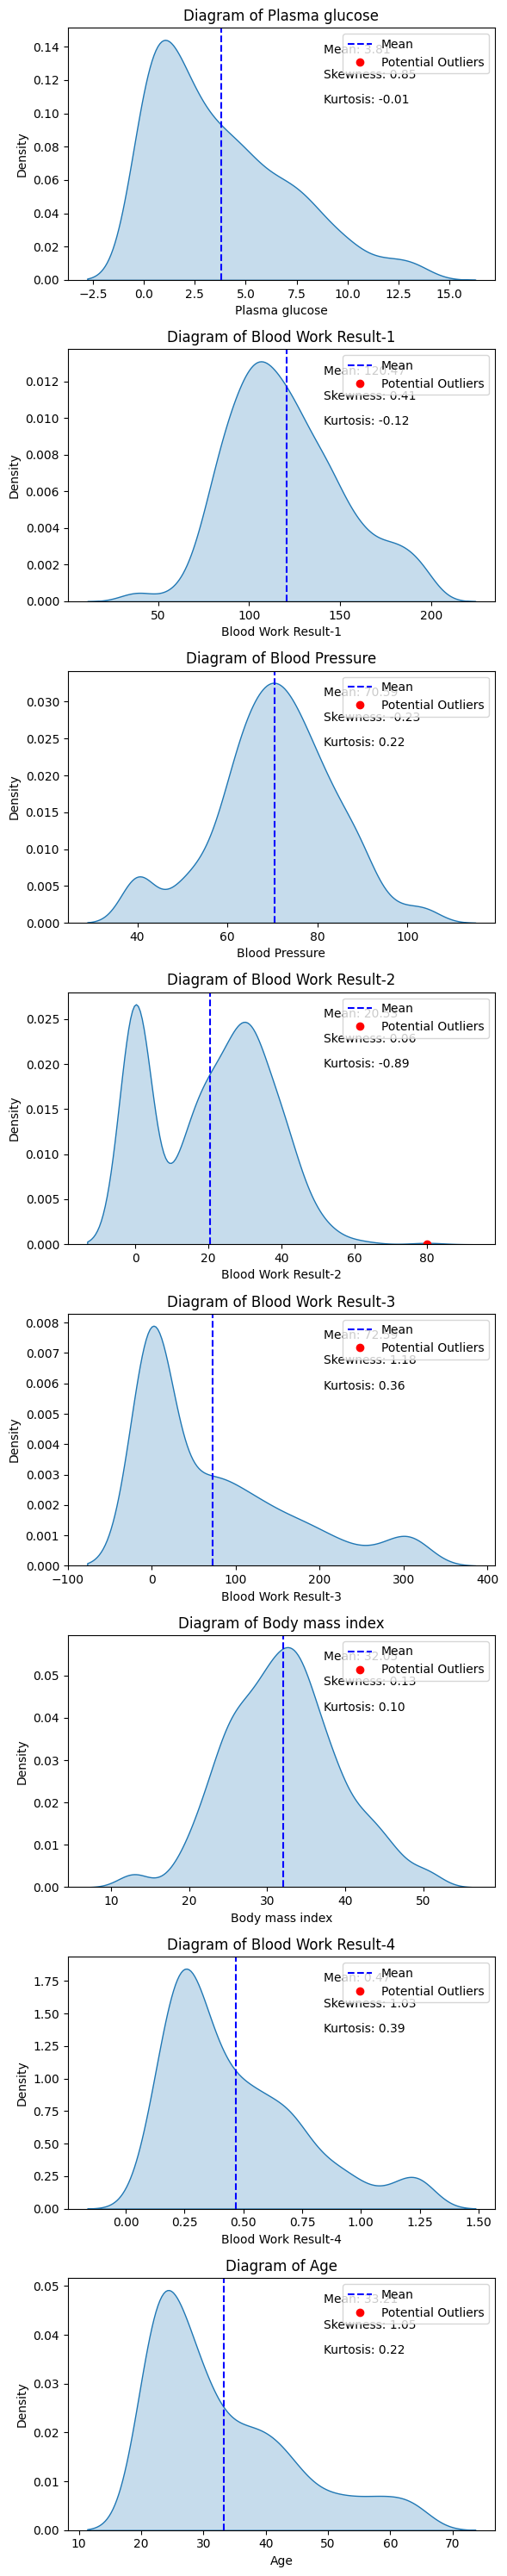

In [37]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_names), figsize=(6, 30))
for i, col in enumerate(cols_names):
    sns.kdeplot(data=train_df, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Diagram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()

    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)

    # Add mean line
    axes[i].axvline(mean_val, color='blue', linestyle='--', label='Mean')

    # Add blue dots to indicate potential outliers
    outliers = train_df[(train_df[col] > mean_val + 3 * train_df[col].std()) | (train_df[col] < mean_val - 3 * train_df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

    # Add legend
    axes[i].legend()

plt.tight_layout()
plt.show()

Findings:

- The majority of patients attended blood work 1 and 3 appointments.
- Most patients had blood pressure readings between 60 and 80.
- The glucose levels of the majority of patients were less than 5.
- A significant portion of patients were younger than 40 years old.

In [ ]:
# Code here

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

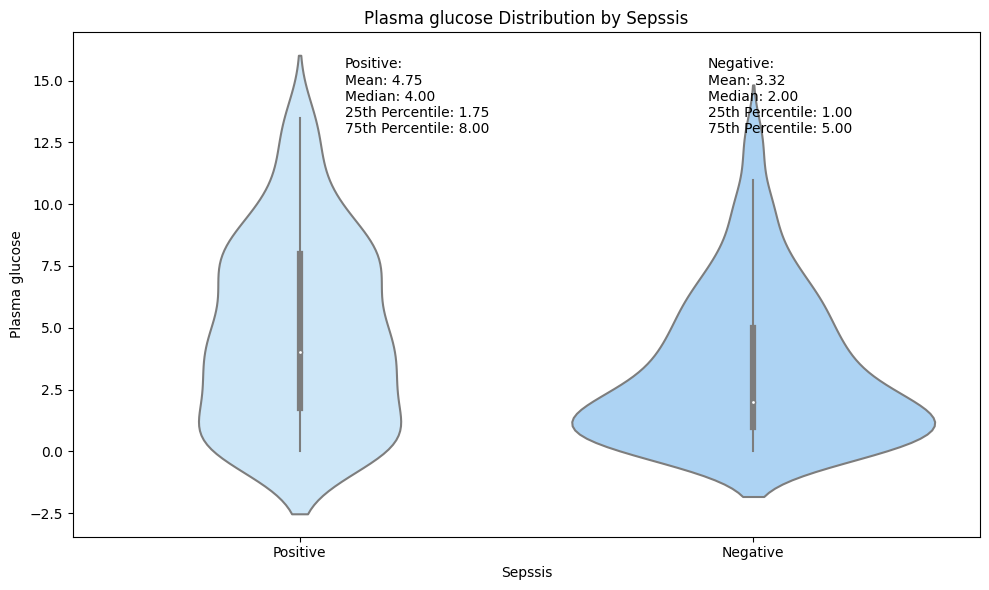

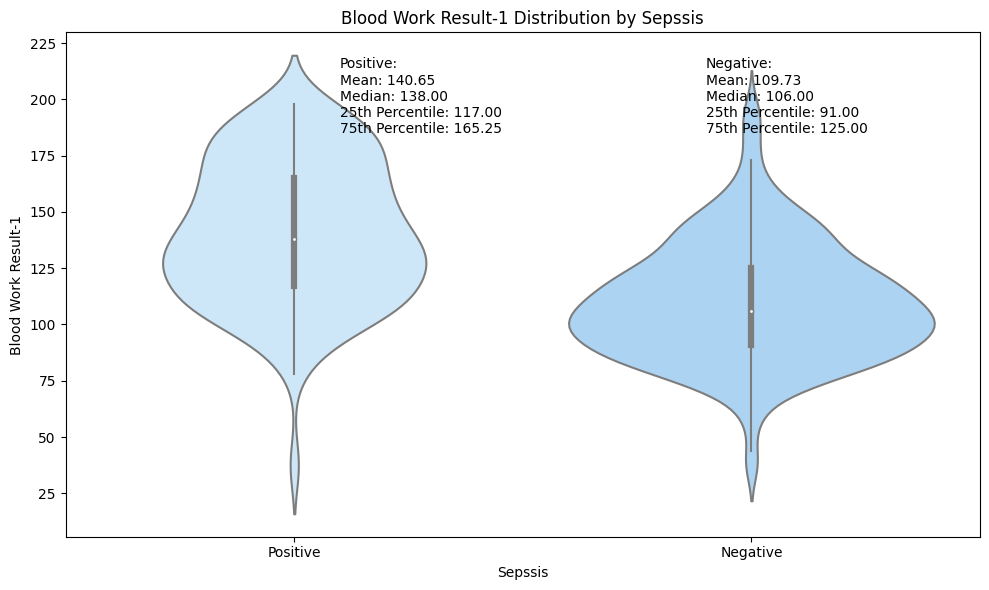

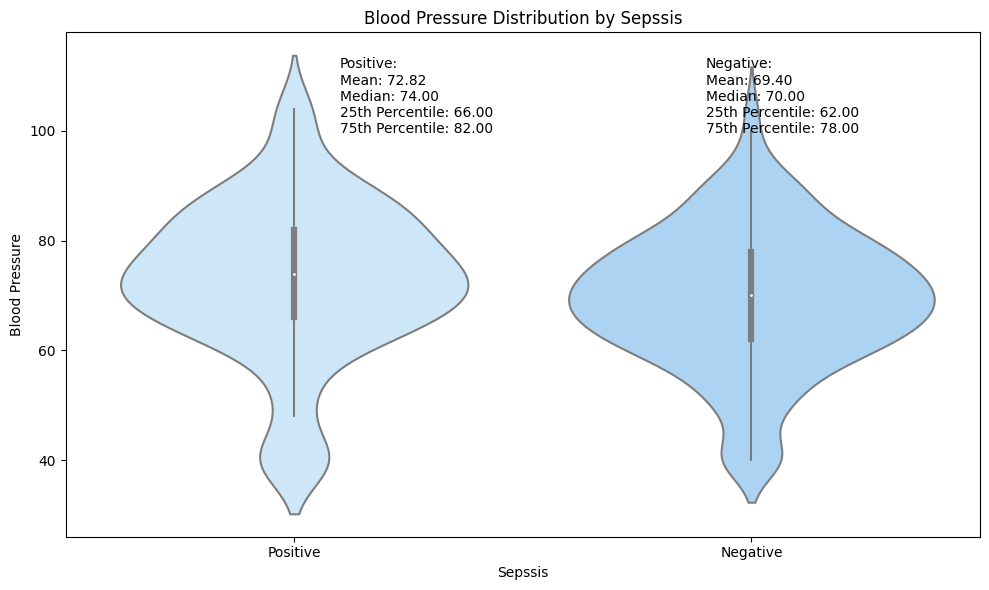

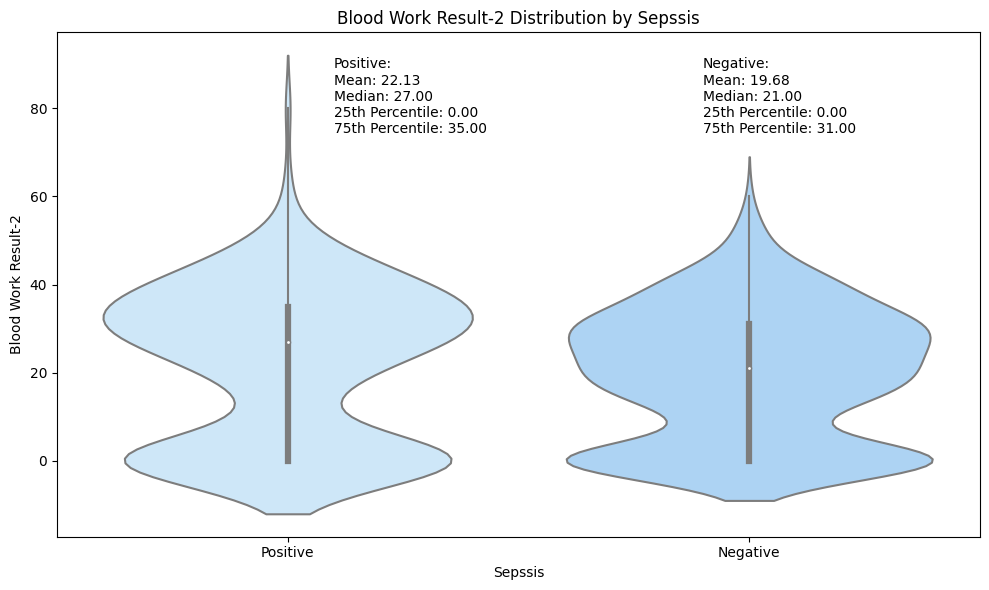

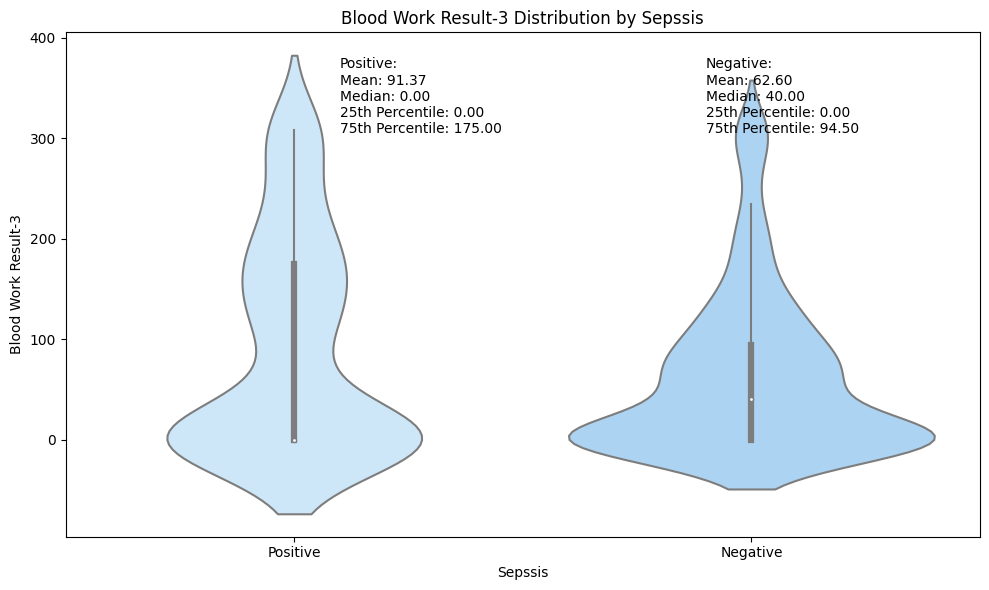

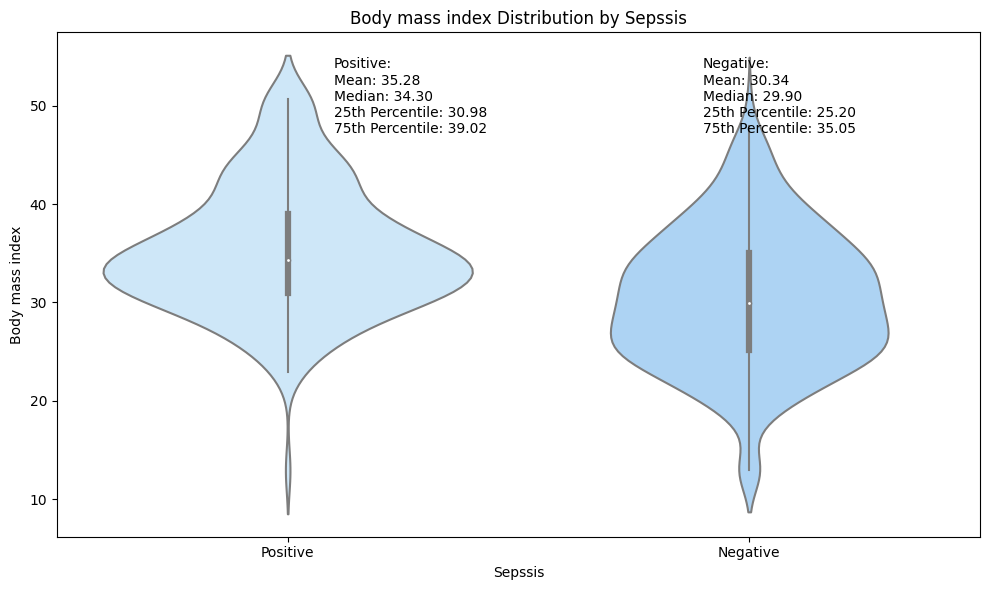

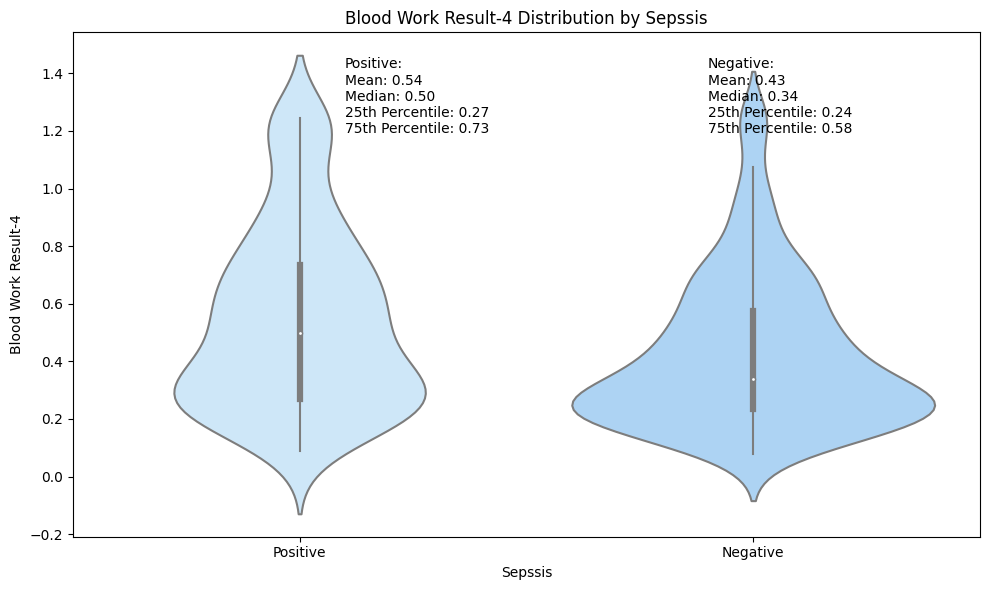

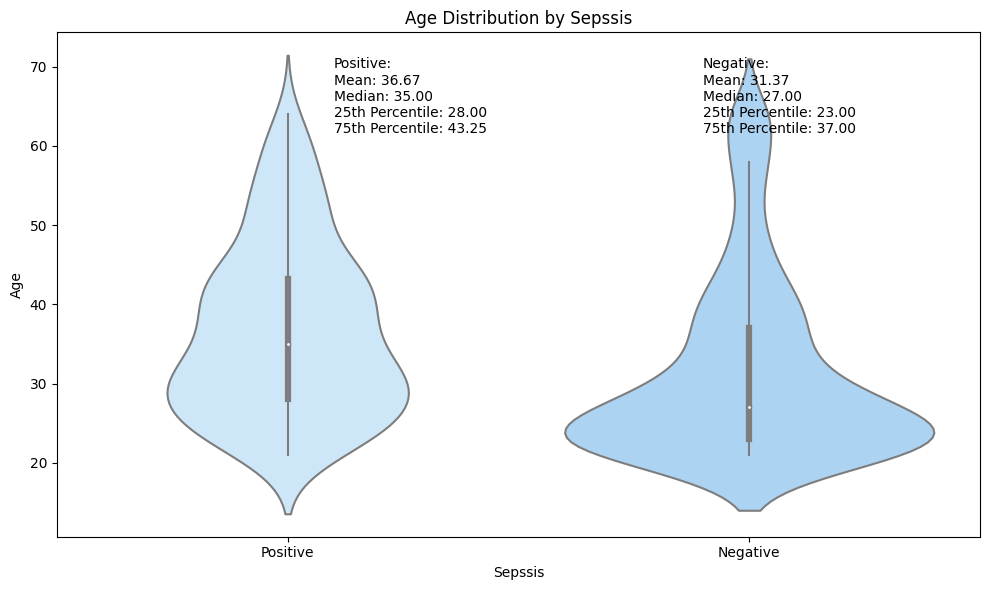

In [35]:

# Define a custom color palette with a blend of blue shades
color_palette = ['#c7e9ff', '#a1d4ff', '#7ac0ff', '#55abff', '#3296ff']

# Numerical Variables - Violin plots with statistics
for var in cols_names:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Sepssis', y=var, palette=color_palette)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate statistics
    positive_vals = train_df[train_df['Sepssis'] == 'Positive'][var]
    negative_vals = train_df[train_df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }

    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes, color='black')
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes, color='black')

    plt.tight_layout()
    plt.show()


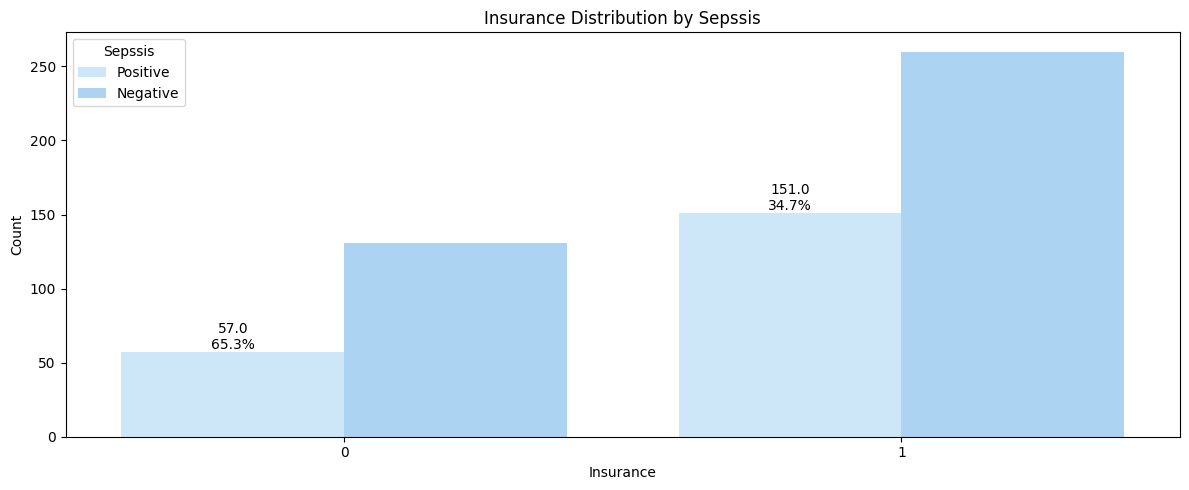

In [40]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=train_df, x=var, hue='Sepssis', palette=color_palette)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(train_df['Sepssis'])
    percentages = train_df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [52]:
# Replace "Positive" with 1 and "Negative" with 0
train_df['Sepssis'] = train_df['Sepssis'].replace({'Positive': 1, 'Negative': 0})

# Calculate correlation coefficients
numerical_vars = cols_names + ['Insurance'] # Combine the two lists into a single list
correlations = train_df[numerical_vars + ['Sepssis']].corr()

# Print correlation coefficients
for var in numerical_vars:
    correlation = correlations.loc[var, 'Sepssis']
    print(f"Pearson correlation between 'Sepssis' and '{var}': {correlation:.2f}")
# Print the updated DataFrame
train_df.head(5)

Pearson correlation between 'Sepssis' and 'Plasma glucose': 0.21
Pearson correlation between 'Sepssis' and 'Blood Work Result-1': 0.46
Pearson correlation between 'Sepssis' and 'Blood Pressure': 0.12
Pearson correlation between 'Sepssis' and 'Blood Work Result-2': 0.07
Pearson correlation between 'Sepssis' and 'Blood Work Result-3': 0.15
Pearson correlation between 'Sepssis' and 'Body mass index': 0.33
Pearson correlation between 'Sepssis' and 'Blood Work Result-4': 0.19
Pearson correlation between 'Sepssis' and 'Age': 0.22
Pearson correlation between 'Sepssis' and 'Insurance': 0.06


,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6.0,148.0,72,35,0.0,33.6,0.6270,50,0,1
ICU200011,1.0,85.0,66,29,0.0,26.6,0.3510,31,0,0
ICU200012,8.0,183.0,64,0,0.0,23.3,0.6720,32,1,1
ICU200013,1.0,89.0,66,23,94.0,28.1,0.1670,21,1,0
ICU200014,0.0,137.0,40,35,168.0,43.1,1.2455,33,1,1


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# Use pandas.DataFrame.drop_duplicates method

## Dataset Splitting

In [ ]:
# Use train_test_split with a random_state, and add stratify for Classification

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app